In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

IMPORTING THE DATA

In [107]:
data_set=pd.read_csv('Delhi_v2.csv')
print(data_set.head(1))

   Unnamed: 0      price                            Address    area  latitude  \
0           0  5600000.0  Noida Extension, Noida, Delhi NCR  1350.0  28.60885   

   longitude  Bedrooms  Bathrooms  Balcony              Status      neworold  \
0   77.46056       3.0        3.0      NaN  Under Construction  New Property   

   parking Furnished_status  Lift Landmarks type_of_building  \
0      NaN              NaN   2.0       NaN             Flat   

                                                desc   Price_sqft  
0  \n\n\n                                Welcome ...  4148.148148  


FINDING THE MISSING FIELDS

In [108]:
missing=data_set.isnull().sum()
print(missing)

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64


ENSURING THE EVEN DISTRIBUTION OF THE DATA

/var/folders/9q/xzj25yy916g82zgg42sgjcz80000gn/T/ipykernel_9906/3741930715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trg)


<Axes: xlabel='price', ylabel='Density'>

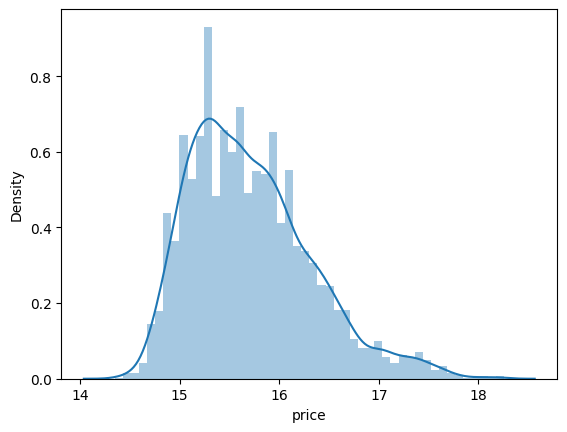

In [110]:
import seaborn as sns
trg=np.log(data_set["price"])
sns.distplot(trg)

REMOVING THE NOT REQUIRED FEILDS

In [111]:
num=data_set.select_dtypes(include=[np.number])
non_num=data_set.select_dtypes(exclude=[np.number])
rem1=("Landmarks","desc")
rem2=("latitude","longitude","Unnamed: 0")
for i in rem1:
    del non_num[i]
for i in rem2:
    del num[i]

In [119]:
num.columns

Index(['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift',
       'Price_sqft'],
      dtype='object')

In [118]:
non_num.columns 

Index(['Address', 'Status', 'neworold', 'Furnished_status',
       'type_of_building'],
      dtype='object')

TAKKING THE TWO REQUIRED DATA FEILDS (RELATION BETWEEN THE TWO)

In [114]:
x=data_set["area"].values
y=np.log(data_set["price"].values)
#y=data_set["Price_sqft"].values

FINDING THE REQUIRED VALUES TO USE IN THE FORMULA OF SLOPE

In [115]:
xmean=np.mean(x)
ymean=np.mean(y)
#Total number of values
n = len(x) 
# Using the formula to calculate bl and b2 
numer = 0 
denom = 0 
for i in range(n): 
    numer += (x[i] - xmean) * (y[i] - ymean) 
    denom += (x[i] - xmean) ** 2 
b1 = numer / denom 
b0 = ymean - (b1 * xmean) 
    # Print coefficients 
print(b1, b0)


0.0006804999769665315 14.752407060189524


PLOTTING THE GRAPH

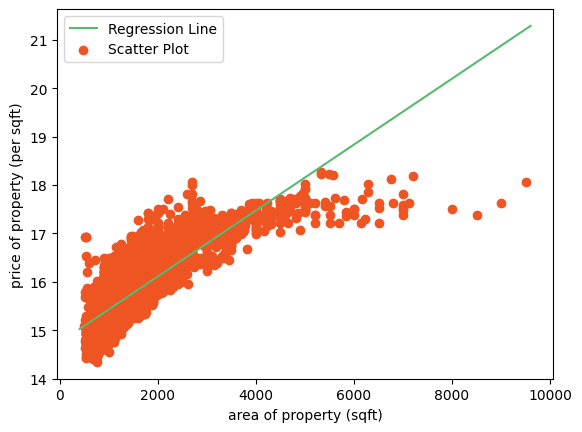

In [116]:
max_x = np.max(x) + 100
min_x = np.min (x) - 100 
# Calculating Line values x and y 
x_ = np. linspace(min_x, max_x, 1000) 
y_ = b0 + b1 * x_ 
#Ploting Line 
mpl. plot(x_, y_, color='#58b970', label='Regression Line') # Ploting Scatter Points 
mpl.scatter(x, y, c='#ef5423', label='Scatter Plot') 
mpl.xlabel('area of property (sqft)') 
mpl.ylabel( 'price of property (per sqft)') 
mpl.legend()
mpl.show()

FINDING THE R2 VALUE

In [117]:
ss_t = 0 
ss_r = 0 
for i in range(n ): 
    y_pred = b0 + b1 * x[i] 
    ss_t += (y[i] - ymean)**2
    ss_r += (y[i] - y_pred)**2
r2 = 1 - (ss_r/ss_t) 
print (r2)

0.6303217085261439
